# Introduction to Machine Learning - Exercise 3
* The aim of the exercise is to learn how to use distance metrics and k-NN classifier.

## Import used packages

In [1]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use
from sklearn.neighbors import KNeighborsClassifier # k-nearest neighbors
from sklearn.model_selection import train_test_split # split data into training and testing sets
from sklearn.metrics import accuracy_score # accuracy
from sklearn.preprocessing import StandardScaler # standardize features

## Load the data into the Pandas DataFrame - in our case it is a csv file
* https://raw.githubusercontent.com/lubsar/EFREI-Introduction-to-Machine-Learning/blob/main//datasets/iris.csv

![meme01](https://github.com/lubsar/EFREI-Introduction-to-Machine-Learning/blob/main/images/knn_iris.png?raw=true)


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lubsar/EFREI-Introduction-to-Machine-Learning/main/datasets/iris.csv', sep=',')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# We will take a look at the data first
* sepal_length, sepal_width, petal_length, petal_width are the features

* **species** is the target variable

<Axes: xlabel='species', ylabel='sepal_length'>

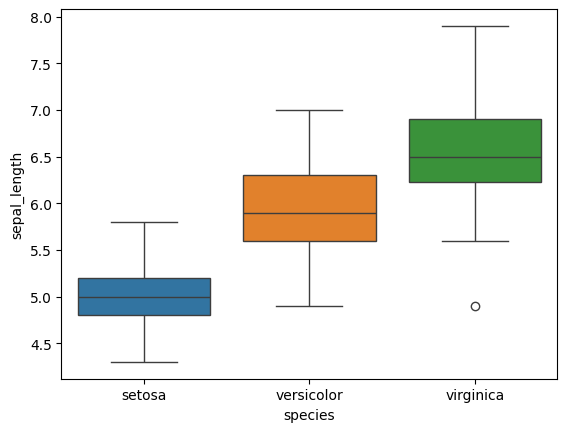

In [3]:
sns.boxplot(data=df, x='species', y='sepal_length', hue='species')

<Axes: xlabel='species', ylabel='sepal_width'>

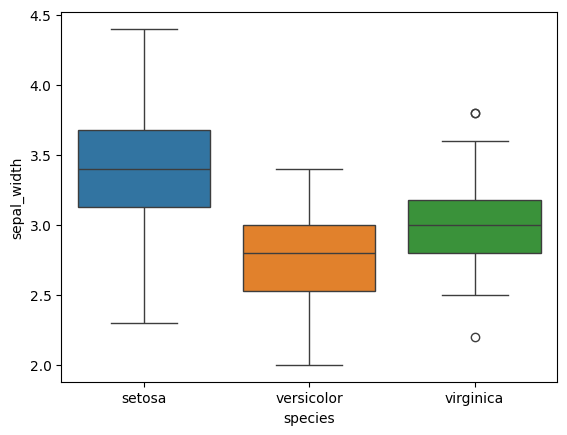

In [4]:
sns.boxplot(data=df, x='species', y='sepal_width', hue='species')

<Axes: xlabel='species', ylabel='petal_length'>

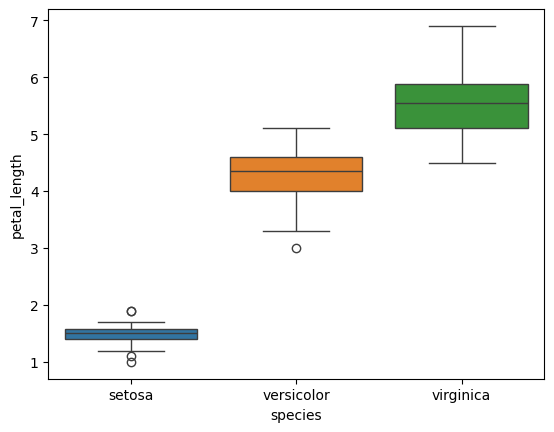

In [5]:
sns.boxplot(data=df, x='species', y='petal_length', hue='species')

<Axes: xlabel='species', ylabel='petal_width'>

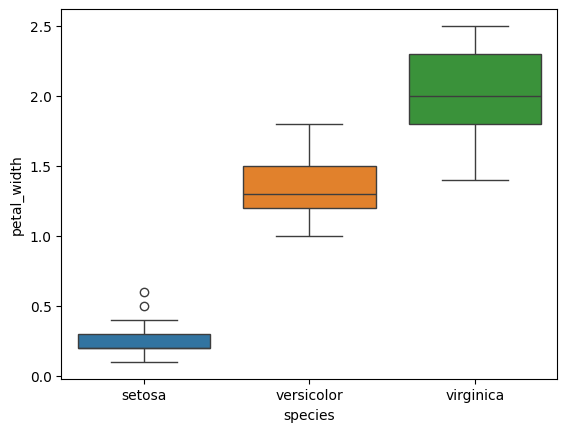

In [6]:
sns.boxplot(data=df, x='species', y='petal_width', hue='species')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

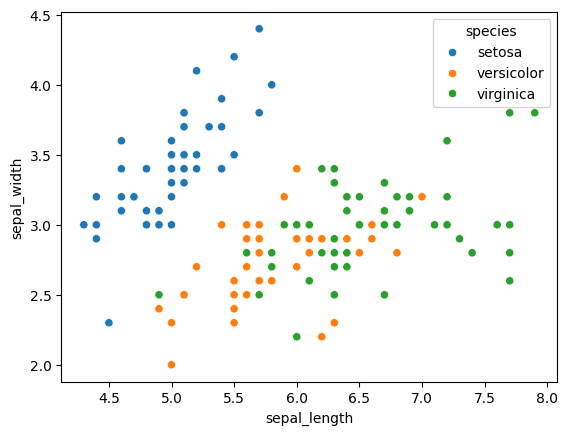

In [7]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

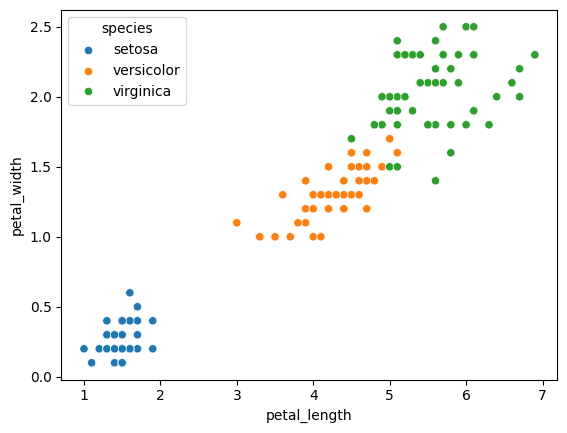

In [8]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

# 🔎 What features seems to be the most discriminative?

# 🚀 k-Nearest Neighbors classifier
* How does it work?
* What is a distance metric?
  * Which one is default for k-NN?

### Example: Calculating Euclidean Distance

Given two vectors with 5 numbers:

- **Vector A**: (2, 4, 6, 8, 10)
- **Vector B**: (1, 3, 5, 7, 9)

**🔎 What is the result?**

### Example: Calculating Manhattan Distance

Given two vectors with 5 numbers:

- **Vector A**: (2, 4, 6, 8, 10)
- **Vector B**: (1, 3, 5, 7, 9)

**🔎 What is the result?**

### Example: Finding the 3 Closest Vectors and Applying Majority Voting

We are given one **selected vector** and a set of **5 different vectors**. Each vector belongs to one of two classes: **Class 0** or **Class 1**. 

We will calculate the Euclidean distance between the selected vector and each of the different vectors, find the 3 closest vectors, and then assign a class to the selected vector using majority voting.

#### Selected Vector
- **Vector S**: (2, 3, 4)  
  - Class: **Unknown** (to be determined)

#### Set of Different Vectors (with classes)
- **Vector A**: (1, 2, 3), Class 0
- **Vector B**: (3, 3, 3), Class 1
- **Vector C**: (2, 5, 6), Class 1
- **Vector D**: (0, 0, 0), Class 0
- **Vector E**: (4, 4, 4), Class 1

**🔎 What is the class?**

![meme02](https://github.com/lubsar/EFREI-Introduction-to-Machine-Learning/blob/main/images/knn_meme_01.jpg?raw=true)

## 📌 Normalizing & Splitting the Data

### **Splitting the Data**
-  The data is divided into two subsets:
  - **Training Data**: Used to train the machine learning model.
    - The algorithm learns the relationship between features and the target.
    - It finds patterns in the training data that will help in making predictions on unseen data.
  -  **Test Data**: Used to evaluate the model’s performance.
       - 📊 The model makes predictions on the test data.
       - 🔁 These predictions are then compared to the actual target values for accuracy assessment.
  
### ⚖️ **Normalizing the Data**
- Ensuring features are on a similar scale improves the performance of many machine learning algorithms.
- 🎯 Important step for any distance-based algorithm (k-means, knn or even linear regression)

# Split the data into features and labels

In [9]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

In [10]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

# ⚡ Split the data into train and test set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

# ⚡ Standardize features

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train[:10]

array([[ 0.70202101,  0.14513769,  1.02912271,  0.84406012],
       [-0.73597366,  2.56409926, -1.25253503, -1.4126668 ],
       [-0.49630788,  0.87082616, -1.25253503, -1.01442087],
       [ 1.30118546,  0.14513769,  0.80095693,  1.50780333],
       [ 0.58218812, -1.30623925,  0.74391549,  0.97680876],
       [ 0.46235523, -0.33865462,  0.34462539,  0.18031691],
       [-0.85580655,  0.62893001, -1.13845214, -0.88167223],
       [-0.25664211, -0.09675846,  0.45870827,  0.44581419],
       [ 0.46235523, -2.03192772,  0.45870827,  0.44581419],
       [-1.21530522, -0.09675846, -1.30957647, -1.4126668 ]])

# 🚀 Fitting and Evaluating the Model
* We are now ready to train the model. 
* For this, we’ll use a fixed value of 3 for k.
  * 📒 We can try different values as well
* We first create an instance of the kNN model, then fit this to our training data. 
  * **We pass both the features and the target variable, so the model can learn.**

In [15]:
alg = KNeighborsClassifier(n_neighbors=3)
alg.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


# 📈 The last step is getting the predictions and calculating the accuracy of the model

In [16]:
y_pred = alg.predict(X_test)
y_pred

array(['versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

## Accuracy score
* 📌 Accuracy is the proportion of correctly classified instances
* It is a good measure when the classes are balanced
    * 🔎 What does balanced mean?
* Range of accuracy_score is [0, 1]
    * **1** is the **best** score
    * **0** is the **worst** score

### 🚀 What if `k=5`? What `accuracy_score` does it produce? Try it!
* 🔎 Is the result better or worse? Why?

In [17]:
accuracy_score(y_test, y_pred)

0.9333333333333333

# ✅ Task
- 📒 Code two python functions `my_euclidean_distance` and `my_manhattan_distance` which will calculate the distances for two given vectors
- Code function `find_neighbour` 
  - 📌 It will let you select `my_euclidean_distance` or `my_manhattan_distance` for distance calculation 
  - 📌 It will find the closest vector from a set of vectors to the target vector and return it
- 🚀 Test the functions on the vectors that we have used in examples on the blackboard

In [18]:
def my_euclidean_distance(x: list, y:list) -> float:
    pass

def my_manhattan_distance(x: list, y:list) -> float:
    pass

# distance = 'euclidean_distance' or 'manhattan_distance'
def find_neighbour(target_vector: list, vectors: list[list], distance: str = 'euclidean_distance') -> list:
    pass